# Foundations of Computational Economics #23

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## More on Newton-Raphson method

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/DKG_bJhVbsM](https://youtu.be/DKG_bJhVbsM)

Description: Failures of Newton method, domain of attraction. Multivariate Newton for optimization problems.

### Another look at Newton method

- iterative solver  
- Newton step $ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $  
- fast (quadratic) convergence  


Today:
- potential problems
- multivariate version

In [2]:
def newton(fun,grad,x0,tol=1e-6,maxiter=100,callback=None):
    '''Newton method for solving equation f(x)=0
    with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    for i in range(maxiter):
        x1 = x0 - fun(x0)/grad(x0) # newton step same as the function
        err = abs(x1-x0)
        if callback != None: callback(iter=i,err=err,x0=x0,x1=x1,fun=fun)
        if err<tol: break
        x0 = x1
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return x1

In [3]:
f = lambda x: -4*x**3+5*x+1 # function
g = lambda x: -12*x**2+5 # Gradient/Derivative
x = newton(f,g,x0=-2.5,maxiter=7)
print('Solution is x=%1.3f, f(x)=%1.12f' % (x,f(x)))

Solution is x=-1.000, f(x)=0.000000000000


In [4]:
# make nice plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

def newton_pic(f,g,x0,    # function, gradient, initial point
               a=0,b=1,   # bounds for the picture
               **kwargs):  # additional parameters passed to solver
    '''Illustrate the Newton method iterations'''
    xd = np.linspace(a,b,1000)       # x grid
    plt.plot(xd,f(xd),c='red')       # plot the function
    plt.plot([a,b],[0,0],c='black')  # plot zero line
    ylim=[f(a),min(f(b),0)]
    def plot_step(**kwargs):
        plot_step.counter += 1
        x0,x1 = kwargs['x0'],kwargs['x1']
        f0 = kwargs['fun'](x0)
        plt.plot([x0,x0],[0,f0],c='green')
        plt.plot([x0,x1],[f0,0],c='green')
    plot_step.counter = 0
    try:
        newton(f,g,x0,callback=plot_step,**kwargs)
        print('Converged in %d steps'%plot_step.counter)
    except RuntimeError:  # catch the Runtime convergence error
        print('Failed to converge in %d iterations!'%plot_step.counter)
    plt.xlim((a,b))
    plt.show()

Converged in 7 steps


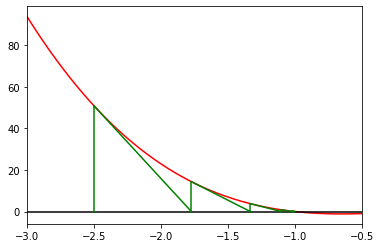

In [5]:
newton_pic(f=f,g=g,x0=-2.5,a=-3,b=-.5)

### When does Newton fail?

1. Multiple solutions — *be aware*  
1. Failures  
  - diversion (domain of attraction)  
  - cycles  
  - function domain  
  - differentiability  
1. Reduced performance — may be slower in special cases  

#### Multiple solutions

Converged in 7 steps


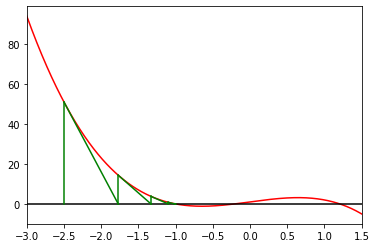

In [7]:
x0 = -2.5  # -2.5 -0.595 0.46
newton_pic(f=f,g=g,x0=x0,a=-3,b=1.5)

#### Diversion

Converged in 6 steps


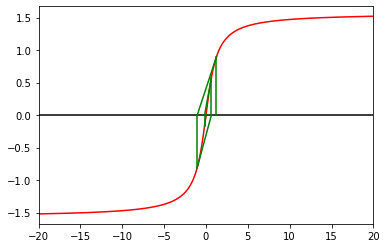

Failed to converge in 8 iterations!


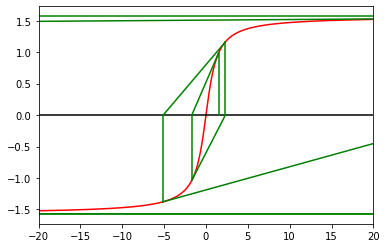

In [8]:
f = lambda x: np.arctan(x)
g = lambda x: 1/(1+x**2)
newton_pic(f=f,g=g,x0=1.25,a=-20,b=20)
newton_pic(f=f,g=g,x0=1.5,a=-20,b=20,maxiter=8)

#### Cycles

Failed to converge in 15 iterations!


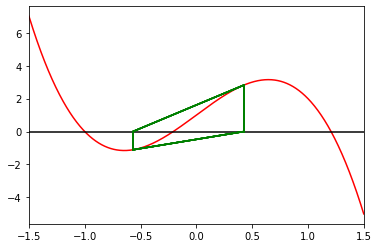

In [9]:
f = lambda x: -4*x**3+5*x+1 # function
g = lambda x: -12*x**2+5    # derivative
x0 = -0.5689842546416416
newton_pic(f,g,x0,a=-1.5,b=1.5,maxiter=15)

To cycle start with x0 = -0.5734602413205467
Converged in 7 steps


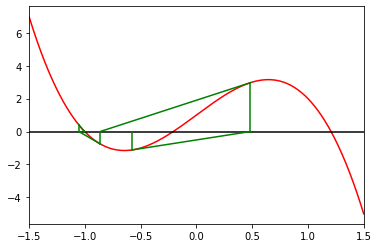

In [11]:
f = lambda x: -4*x**3+5*x+1 # function
g = lambda x: -12*x**2+5    # derivative
h = lambda x: -24*x         # second derivative
# find the unfortunate looping x0
ns = lambda x0: x0 - f(x0)/g(x0) # Newton step
ds = lambda x0: f(x0)*h(x0)/g(x0)**2 # derivative of ns
f2 = lambda x0: ns(ns(x0))-x0
g2 = lambda x0: ds(ns(x0))*ds(x0)-1

x0 = newton(f2,g2,x0=-0.56,tol=1e-2)  # find the cycling starting point
print('To cycle start with x0 = %1.16f'%x0)

newton_pic(f,g,x0,a=-1.5,b=1.5,maxiter=15)

#### Function domain and differentiability

- undefined value of function or the derivative during Newton steps  

C:\Users\timot\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Failed to converge in 100 iterations!


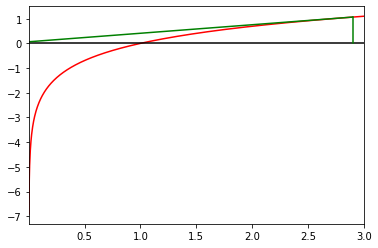

In [12]:
f = lambda x: np.log(x)
g = lambda x: 1/x
x0 = 2.9
newton_pic(f,g,x0,a=0.001,b=3)

#### Suboptimal performance

Converged in 100 steps


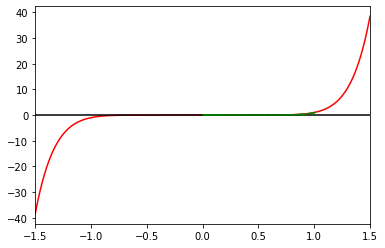

   0:  x =  0.88888888888889  err = 1.111111e-01
   1:  x =  0.79012345679012  err = 9.876543e-02
   2:  x =  0.70233196159122  err = 8.779150e-02
   3:  x =  0.62429507696997  err = 7.803688e-02
   4:  x =  0.55492895730664  err = 6.936612e-02
   5:  x =  0.49327018427257  err = 6.165877e-02
   6:  x =  0.43846238602006  err = 5.480780e-02
   7:  x =  0.38974434312895  err = 4.871804e-02
   8:  x =  0.34643941611462  err = 4.330493e-02
   9:  x =  0.30794614765744  err = 3.849327e-02
  10:  x =  0.27372990902883  err = 3.421624e-02
  11:  x =  0.24331547469230  err = 3.041443e-02
  12:  x =  0.21628042194871  err = 2.703505e-02
  13:  x =  0.19224926395441  err = 2.403116e-02
  14:  x =  0.17088823462614  err = 2.136103e-02
  15:  x =  0.15190065300101  err = 1.898758e-02
  16:  x =  0.13502280266757  err = 1.687785e-02
  17:  x =  0.12002026903784  err = 1.500253e-02
  18:  x =  0.10668468358919  err = 1.333559e-02
  19:  x =  0.09483082985706  err = 1.185385e-02
  20:  x =  0.084294

7.669159237266011e-06

In [14]:
f = lambda x: x**9  # VERY SPECIAL CASE
g = lambda x: 9*x**8
x0 = 1.0
newton_pic(f,g,x0,a=-1.5,b=1.5)
def print_err(**kwargs):
    print('{:4d}:  x = {:17.14f}  err = {:8.6e}'.format(kwargs['iter'],kwargs['x1'],kwargs['err']))
newton(f,g,x0,callback=print_err)

#### Conclusions for the use of Newton-Raphson method in economics

- many of the problematic cases rarely happen!  
- the problems that are real in economic applications:
  1. multiple solutions
  2. function domain constraints
  3. domain of attraction  
- good idea to combine slow robust solver (to get into the domain of attraction) with Newton method (for fast convergence)
  - successive approximations + Newton method is a classic approach in estimation of dynamic programming models (NFXP estimator, Rust 1987)  

#### Newton fractals

- visualizing the domain of attraction for particular problems  


$$
x^3 - 1 = 0
$$

- solutions $ x=1 $ and two more in the complex number plan $ x=1 $  
- draw the number of iterations to converge to any solution  

<img src="_static/img/newton_fractal.png" style="width:1200px;">

[https://www.youtube.com/watch?v=MWD2A0Vg2V0](https://www.youtube.com/watch?v=MWD2A0Vg2V0)

### Multivariate Newton-Raphson

Consider a system of $ n $ non-linear equations with $ n $ variables, given by

$$
G(x) = 0,
$$

- $ x \in \mathbb{R}^n $ and $ G(x) $ is $ n $-valued function.  
- **Jacobian matrix** is $ n $-by-$ n $ matrix of partial derivatives $ \nabla G(x) $  
- Newton step:  


$$
x_{i+1} = x_{i} - \big( \nabla G(x_i) \big)^{-1} G(x_i)
$$

#### Maximization of multivariate function

- classic example for multivariate Newton is solution of F.O.C. in multivariate optimization problems  
- consider $ F(x) \rightarrow \max $, where $ x \in \mathbb{R}^n $  
- let $ G(x) $ be the **gradient** of $ F(x) $, which is $ n $-valued function (derivatives with respect to each variable).  


$$
G(x) = \nabla F(x) = 0
$$

- Newton step in this case $ x_{i+1} = x_{i} - \big( \nabla^2 F(x_i) \big)^{-1} \nabla F(x_i) $  
- $ \nabla^2 F(x) $ is $ n $-by-$ n $ matrix of second derivatives is **Hessian matrix**  

#### Example

$$
F(x,y) = 2.575 - 2 \cos(x) \cos(y+\pi) - 0.575 \cos(1.25 \pi - 2x)
$$

In [15]:
F = lambda x, y: 2.575 - 2*np.cos(x)*np.cos(y+np.pi) - 0.575*np.cos(1.25*np.pi - 2*x)

def contour_plot(fun,levels=20,bound=1,npoints=100,ax=None):
    '''Make a contour plot for illustrations'''
    xx = np.linspace(-bound, bound, npoints)
    yy = np.linspace(-bound, bound, npoints)
    X,Y = np.meshgrid(xx, yy)
    Z = fun(X, Y)
    if ax==None:
        fig, ax = plt.subplots(figsize=(10,8))
    cnt = ax.contour(X,Y,Z, vmin=Z.min(), vmax=Z.max(),levels=np.linspace(Z.min(),Z.max(),levels))
    ax.set_aspect('equal', 'box')
    return cnt

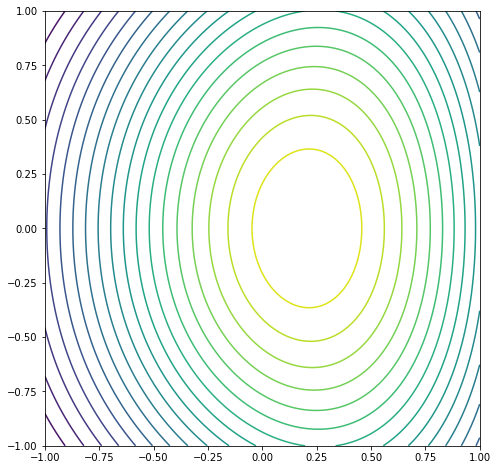

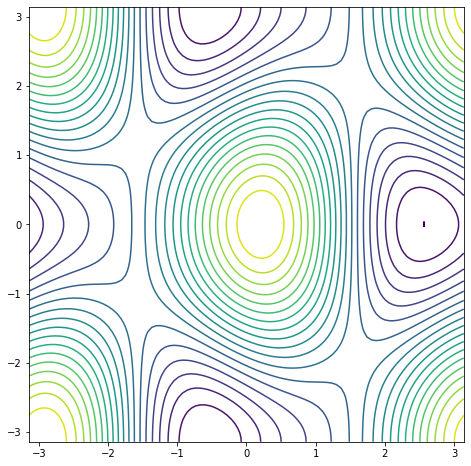

In [16]:
contour_plot(F)
contour_plot(F,bound=np.pi)

#### Jacobian and Hessian

$$
F(x,y) = 2.575 - 2 \cos(x) \cos(y+\pi) - 0.575 \cos(1.25 \pi - 2x)
$$

$$
G(x,y) =
\begin{pmatrix}
2 \sin(x) \cos(y+\pi) - 1.15 \sin(1.25\pi - 2x) \\
2 \cos(x) \sin(y+\pi) \\
\end{pmatrix}
$$

$$
H(x,y) =
\begin{pmatrix}
2 \cos(x) \cos(y+\pi) + 2.3 \cos(1.25\pi - 2x) & -2 \sin(x) \sin(y+\pi) \\
-2 \sin(x) \sin(y+\pi) & 2 \cos(x) \cos(y+\pi) \\
\end{pmatrix}
$$

In [17]:
G = lambda x, y: [2*np.sin(x)*np.cos(y+np.pi) - 2*0.575 * np.sin(1.25*np.pi - 2*x),
                  2*np.cos(x)*np.sin(y+np.pi)]
H = lambda x, y: [[2*np.cos(x)*np.cos(y+np.pi) - 2*0.575 * np.sin(1.25*np.pi - 2*x),
                   -2*np.sin(x)*np.sin(y+np.pi)],
                  [-2*np.sin(x)*np.sin(y+np.pi),
                    2*np.cos(x)*np.cos(y+np.pi)]]

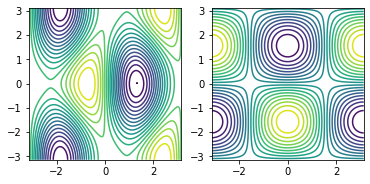

In [18]:
fig, axs = plt.subplots(1, 2)
contour_plot(lambda x,y: G(x,y)[0],ax=axs[0],bound=np.pi)
contour_plot(lambda x,y: G(x,y)[1],ax=axs[1],bound=np.pi)

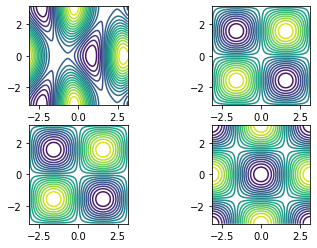

In [19]:
fig, axs = plt.subplots(2, 2)
contour_plot(lambda x,y: H(x,y)[0][0],ax=axs[0,0],bound=np.pi)
contour_plot(lambda x,y: H(x,y)[0][1],ax=axs[0,1],bound=np.pi)
contour_plot(lambda x,y: H(x,y)[1][0],ax=axs[1,0],bound=np.pi)
contour_plot(lambda x,y: H(x,y)[1][1],ax=axs[1,1],bound=np.pi)

In [21]:
def newton2(fun,grad,x0,tol=1e-6,maxiter=100,callback=None):
    '''Newton method for solving equation f(x)=0, x is vector of 2 elements,
    with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    # conversion to array function of array argument
    npfun = lambda x: np.asarray(fun(x[0],x[1]))
    npgrad = lambda x: np.asarray(grad(x[0],x[1]))
    for i in range(maxiter):
        x1 = x0 - np.linalg.inv(npgrad(x0)) @ npfun(x0)  # matrix version
        err = np.amax(np.abs(x1-x0))  # vector version
        if callback != None: callback(iter=i,err=err,x0=x0,x1=x1,fun=fun)
        if err<tol: break
        x0 = x1
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return x1

In [22]:
def plot_step(**kwargs):
    plot_step.counter += 1
    x0,x1 = kwargs['x0'],kwargs['x1']
    b = max(np.amax(np.abs(x0)),np.amax(np.abs(x1)))+1
    if plot_step.counter == 1 or b>plot_step.bound:
        plot_step.bound=b  # save the bound for later calls
        if plot_step.counter > 1:
            # remove old conrours if resdrawing
            for c in plot_step.contours.collections:
                c.remove()
        plot_step.contours = contour_plot(F,bound=b,ax=ax)
    ax.plot([x0[0],x1[0]],[x0[1],x1[1]],c='r')
    if plot_step.counter == 1:
        ax.scatter(x0[0],x0[1],c='r',edgecolors='r')
plot_step.counter = 0

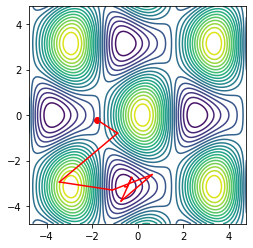

Converged in 14 steps
x*    = (-0.56967,-3.14159)
G(x*) = (9.68660e-08,0.00000e+00)


In [23]:
x0 = np.array([-1.8,-.2])
# x0 = np.array([-.8,-.2])
# x0 = np.array([-.2,1.8])
# x0 = np.array([-.2,-.2])
# x0 = np.array([-.25,1.5])
fig, ax = plt.subplots(1,1)
xs = newton2(G,H,x0,callback=plot_step)
plt.show()
print('Converged in %d steps'%plot_step.counter)
print('x*    = (%1.5f,%1.5f)'%tuple(xs))
print('G(x*) = (%1.5e,%1.5e)'%tuple(G(*tuple(xs))))

### Further learning resources

- Oscar Veliz videos on Newton method and domains of attraction
  [https://www.youtube.com/watch?v=E24zUEKqgwQ](https://www.youtube.com/watch?v=E24zUEKqgwQ)
  [https://www.youtube.com/watch?v=zyXRo8Qjj0A](https://www.youtube.com/watch?v=zyXRo8Qjj0A)
  [https://www.youtube.com/watch?v=MWD2A0Vg2V0](https://www.youtube.com/watch?v=MWD2A0Vg2V0)  
- NFXP estimator
  [https://en.wikipedia.org/wiki/Dynamic_discrete_choice#Estimation_with_nested_fixed_point_algorithm](https://en.wikipedia.org/wiki/Dynamic_discrete_choice#Estimation_with_nested_fixed_point_algorithm)  